In [279]:
import pandas as pd  
data = pd.read_csv('~/data/trip.csv')
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [280]:
data.shape

(22701, 9)

### 결측치 판단 및 처리

In [282]:
len(data)-data.count()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [283]:
# 결측치 포함된 행
data[data.isnull().any(axis=1)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


### 결측치 비율
- 전체 0.01% 이므로 결측치 있는 행 삭제로 처리

In [284]:
len(data[data.isnull().any(axis=1)])/data.shape[0]
data.isnull().any(axis=1).mean()

0.0001321527686005022

In [285]:
data.dropna(how='any', inplace=True) # 결측치 삭제
data.shape

(22698, 9)

- 결측치 있던 3행 삭제됨(22698 = 22701-3)


In [273]:
data.isnull().any(axis=1).mean()

0.0

### 중복값 처리

In [286]:
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [287]:
data[(data['passenger_name']=='Sarah Gross')]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [288]:
data[(data['passenger_name']=='Lisa Bullock')]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


- 동일한 시간으로 동일한 내용 택시요금이 찍힌 것이므로 중복값 삭제 처리

In [289]:
# 나중에 찍힌 값으로 유지
index_to_remove = [16, 203]  
data.drop(index_to_remove, inplace=True)

data.shape

(22696, 9)

In [290]:
data[(data['passenger_name'].isin(['Lisa Bullock', 'Sarah Gross']))]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


## 이상치 판단 및 처리

In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22696 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22696 non-null  object 
 1   tpep_pickup_datetime   22696 non-null  object 
 2   tpep_dropoff_datetime  22696 non-null  object 
 3   payment_method         22696 non-null  object 
 4   passenger_count        22696 non-null  int64  
 5   trip_distance          22696 non-null  float64
 6   fare_amount            22696 non-null  float64
 7   tip_amount             22696 non-null  float64
 8   tolls_amount           22696 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


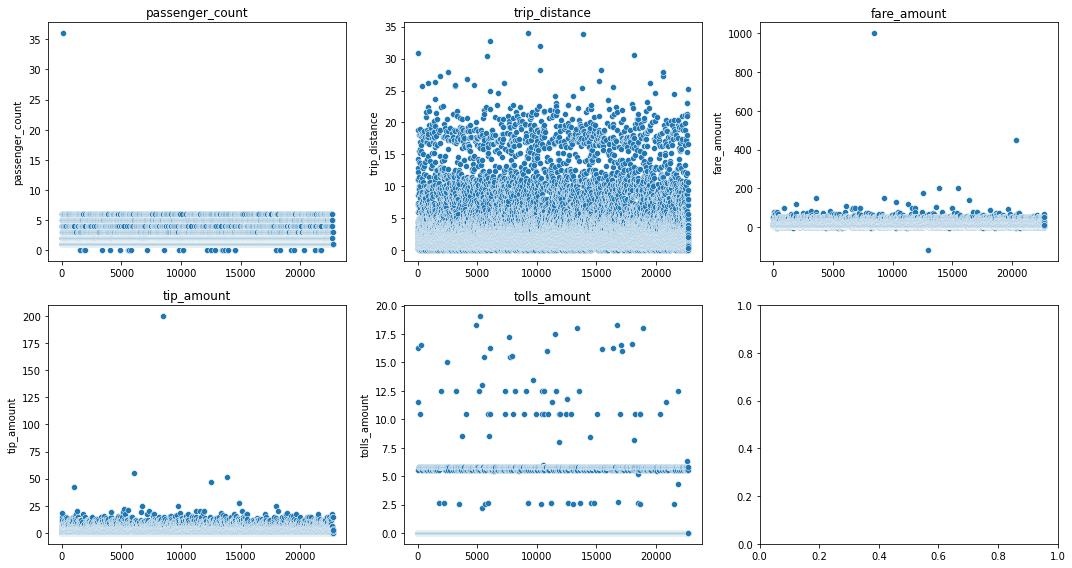

In [281]:
data_num = data[['passenger_count','trip_distance','fare_amount','tip_amount','tolls_amount']]

# subplot 생성
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# 각 산점도 그리기
for i, column in enumerate(data_num.columns):
    row, col = divmod(i, 3)
    sns.scatterplot(x=data.index, y=column, data=data, ax=axes[row, col])
    axes[row, col].set_title(f'{column}')


plt.tight_layout()
plt.show()

In [114]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000
mean,1.643638,2.912231,13.023681,1.835363,0.312329
std,1.305027,3.651483,13.240551,2.800182,1.398834
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


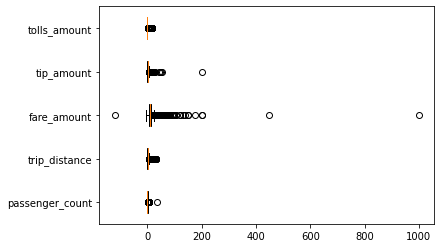

In [111]:
import matplotlib.pyplot as plt
numeric_columns = data.select_dtypes(include='number')


fig, ax = plt.subplots()
ax.boxplot(numeric_columns.values, vert=False, patch_artist=True, labels=numeric_columns.columns, boxprops=dict(facecolor="skyblue"))
plt.show()

- 이상치 처리 전 zscore로 이상치 탐색해보기..

In [141]:
# 예시 데이터프레임 생성
data_out = data[['fare_amount', 'tip_amount', 'passenger_count']]

# Z 점수 계산 함수
def calculate_z_score(series):
    z_scores = (series - series.mean()) / series.std()
    return z_scores


# Z 점수 기반 이상치 여부 계산 함수
def detect_outliers(z_scores, threshold):
    return np.sum(np.abs(z_scores) > threshold)

result_table = pd.DataFrame(index=['fare_amount', 'tip_amount', 'passenger_count'])

# Z 점수 계산 및 이상치 여부 테이블 생성
thresholds = [1.5, 2, 3]

for variable in data_out.columns:
    z_scores = calculate_z_score(data_out[variable])
    for threshold in thresholds:
        outliers_count = detect_outliers(z_scores, threshold)
        result_table.loc[variable, f'Z : {threshold}'] = outliers_count

# 결과 테이블 출력
result_table.astype(int)

,Z : 1.5,Z : 2,Z : 3
fare_amount,1383,935,145
tip_amount,1209,871,429
passenger_count,2291,1836,693


- 중복값, 널값 제거하고 인덱스 재배열하기 
    - 지금까지 삭제된 게 5행이라서 인덱스 보기 힘들어서 재배열했다 !

In [182]:
# 인덱스 재배열
data = data.reset_index(drop=True)

In [183]:
data[['fare_amount', 'tip_amount', 'passenger_count']].sort_values(by='fare_amount',ascending=False)

,fare_amount,tip_amount,passenger_count
8473,999.99,200.00,1
20309,450.00,0.00,2
13858,200.01,51.64,1
15471,200.00,11.00,1
12508,175.00,46.69,1
...,...,...,...
17599,-4.00,0.00,1
14711,-4.00,0.00,5
20695,-4.50,0.00,1
11201,-4.50,0.00,1


In [171]:
data['passenger_count'].sort_values(ascending=False)

62       36
0         6
7184      6
21860     6
7370      6
         ..
21635     0
21749     0
14516     0
12799     0
12200     0
Name: passenger_count, Length: 22696, dtype: int64

fare_amount, tip_amount 이상치 있는 행이 동일하다.   
passenger_count는 큰 택시에 36명 탈 수 있지 않나? 한 번에 간건가..? 모르겠다...

In [292]:
pd.DataFrame(data.iloc[8473])
# 해당 값은 이상치로 판단

,8478
passenger_name,Alexis Hanson
tpep_pickup_datetime,02/06/2017 5:50:10 AM
tpep_dropoff_datetime,02/06/2017 5:51:08 AM
payment_method,Credit Card
passenger_count,1
trip_distance,2.6
fare_amount,999.99
tip_amount,200.0
tolls_amount,0.0


In [193]:
pd.DataFrame(data[(data['trip_distance']==2.6) & (data['passenger_count']==1)]).describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,116.0,1.160000e+02,116.000000,116.000000,116.0
mean,1.0,2.600000e+00,21.379224,3.521552,0.0
std,0.0,8.920317e-16,91.692124,18.450012,0.0
min,1.0,2.600000e+00,9.000000,0.000000,0.0
25%,1.0,2.600000e+00,11.000000,0.000000,0.0
50%,1.0,2.600000e+00,12.500000,2.250000,0.0
75%,1.0,2.600000e+00,14.000000,2.750000,0.0
max,1.0,2.600000e+00,999.990000,200.000000,0.0


In [194]:
pd.DataFrame(data[(data['trip_distance']==2.6) & (data['passenger_count']==1)])

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
131,Sara Williamson,11/24/2017 3:17:47 PM,11/24/2017 3:33:57 PM,Credit Card,1,2.6,13.0,0.00,0.0
158,Christopher Ford,04/21/2017 11:15:54 PM,04/21/2017 11:27:41 PM,Cash,1,2.6,11.0,3.00,0.0
287,Jessica Jones,11/24/2017 5:26:07 PM,11/24/2017 5:51:18 PM,Cash,1,2.6,17.0,0.00,0.0
379,Mary Allen,11/04/2017 4:02:42 AM,11/04/2017 4:10:52 AM,Cash,1,2.6,10.5,0.00,0.0
579,Gerald French,02/19/2017 6:24:22 PM,02/19/2017 6:41:59 PM,Credit Card,1,2.6,13.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
21574,Michael Wallace,07/26/2017 9:28:31 PM,07/26/2017 9:43:14 PM,Debit Card,1,2.6,12.0,2.65,0.0
21781,Caitlyn Herrera,06/13/2017 9:46:35 AM,06/13/2017 10:01:42 AM,Cash,1,2.6,12.5,2.65,0.0
22261,Cynthia Caldwell,12/24/2017 9:20:21 AM,12/24/2017 9:29:33 AM,Debit Card,1,2.6,10.0,2.15,0.0
22284,Ruth Singh,02/25/2017 4:25:39 PM,02/25/2017 4:42:39 PM,Cash,1,2.6,13.0,2.75,0.0


In [309]:
data[data['fare_amount']>=500]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
8404,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.6,999.99,200.0,0.0


In [310]:
# 이상치 삭제 
index_to_remove = data[data['fare_amount']>=500].index
data.drop(index_to_remove, inplace=True)

In [313]:
data[data['fare_amount']>=500]
# 인덱스 재배열
data = data.reset_index(drop=True)

In [295]:
data[['fare_amount', 'tip_amount', 'passenger_count']].sort_values(by='fare_amount',ascending=False)

,fare_amount,tip_amount,passenger_count
8472,999.99,200.00,1
20308,450.00,0.00,2
13857,200.01,51.64,1
15470,200.00,11.00,1
12507,175.00,46.69,1
...,...,...,...
14710,-4.00,0.00,5
17598,-4.00,0.00,1
11200,-4.50,0.00,1
20694,-4.50,0.00,1


In [201]:
data_out = data[['fare_amount', 'tip_amount', 'passenger_count']]

# Z 점수 계산 함수
def calculate_z_score(series):
    z_scores = (series - series.mean()) / series.std()
    return z_scores


# Z 점수 기반 이상치 여부 계산 함수
def detect_outliers(z_scores, threshold):
    return np.sum(np.abs(z_scores) > threshold)

result_table = pd.DataFrame(index=['fare_amount', 'tip_amount', 'passenger_count'])

# Z 점수 계산 및 이상치 여부 테이블 생성
thresholds = [1.5, 2, 3]

for variable in data_out.columns:
    z_scores = calculate_z_score(data_out[variable])
    for threshold in thresholds:
        outliers_count = detect_outliers(z_scores, threshold)
        result_table.loc[variable, f'Z : {threshold}'] = outliers_count

# 결과 테이블 출력
result_table.astype(int)

,Z : 1.5,Z : 2,Z : 3
fare_amount,1638,1146,727
tip_amount,1391,1026,573
passenger_count,2291,1836,693


In [296]:
data['passenger_count'].sort_values(ascending=False)

62       36
0         6
19968     6
19375     6
4609      6
         ..
13915     0
3349      0
21634     0
13415     0
12199     0
Name: passenger_count, Length: 22695, dtype: int64

In [297]:
pd.DataFrame(data[data['passenger_count'] >= 6]).sort_values(by='trip_distance', ascending=False)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
411,Melanie Wu,02/18/2017 12:44:04 PM,02/18/2017 1:29:10 PM,Debit Card,6,25.69,69.5,14.06,0.00
15992,Crystal Ward,04/23/2017 3:43:18 PM,04/23/2017 4:52:45 PM,Cash,6,23.53,52.0,11.71,5.76
17998,Richard Mathews,04/18/2017 6:59:39 AM,04/18/2017 7:56:51 AM,Cash,6,22.96,52.0,0.00,5.76
4858,Brian Meadows,05/25/2017 10:18:05 PM,05/25/2017 10:52:09 PM,Cash,6,20.03,52.0,0.00,5.76
18747,Sarah Scott,01/18/2017 4:06:20 PM,01/18/2017 5:05:59 PM,Debit Card,6,19.81,62.0,15.95,0.00
...,...,...,...,...,...,...,...,...,...
4620,Cheryl Norton,01/11/2017 2:46:37 PM,01/11/2017 2:48:48 PM,Debit Card,6,0.08,3.5,0.00,0.00
2147,George Owen,07/06/2017 9:13:14 PM,07/06/2017 9:13:18 PM,Cash,6,0.00,2.5,0.95,0.00
9795,Logan Hahn,04/06/2017 6:21:59 PM,04/06/2017 6:22:07 PM,Credit Card,6,0.00,2.5,3.80,0.00
7146,Alexander Robinson,10/18/2017 4:40:49 PM,10/18/2017 4:40:57 PM,Credit Card,6,0.00,2.5,0.00,0.00


In [208]:
data[['fare_amount', 'trip_distance', 'passenger_count']].sort_values(by='trip_distance')

,fare_amount,trip_distance,passenger_count
5144,10.00,0.00,2
7146,2.50,0.00,6
3057,2.50,0.00,3
5192,2.50,0.00,1
1514,59.00,0.00,1
...,...,...,...
29,80.00,30.83,1
10287,131.00,31.95,1
6061,107.00,32.72,1
13857,200.01,33.92,1


In [211]:
pd.DataFrame(data[data['trip_distance'] <= 0]).sort_values(by='trip_distance', ascending=False)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
127,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
13789,Linda Taylor,03/30/2017 11:23:50 AM,03/30/2017 11:23:57 AM,Debit Card,1,0.0,52.0,10.55,0.0
13966,Matthew Blake,02/23/2017 9:21:25 AM,02/23/2017 9:21:57 AM,Cash,1,0.0,1.0,0.00,0.0
14058,David Wilson,03/30/2017 7:56:31 PM,03/30/2017 7:56:31 PM,Cash,3,0.0,2.5,0.00,0.0
14161,Sheila Mack,10/29/2017 1:14:35 AM,10/29/2017 1:18:13 AM,Debit Card,1,0.0,4.8,1.32,0.0
...,...,...,...,...,...,...,...,...,...
6572,Michael Hendricks,03/31/2017 5:00:35 PM,03/31/2017 5:01:40 PM,Debit Card,1,0.0,3.0,0.00,0.0
6875,Daniel Martinez,08/17/2017 4:06:26 AM,08/17/2017 4:06:29 AM,Debit Card,4,0.0,98.5,0.00,0.0
6905,Amy Allen,03/26/2017 2:07:08 AM,03/26/2017 2:07:12 AM,Credit Card,1,0.0,18.0,2.00,0.0
7146,Alexander Robinson,10/18/2017 4:40:49 PM,10/18/2017 4:40:57 PM,Credit Card,6,0.0,2.5,0.00,0.0


 distance = 0 행 지움

In [298]:
dist_zero = data[data['trip_distance']==0].index
data.drop(dist_zero, inplace=True)

# 인덱스 재배열
data = data.reset_index(drop=True)

In [299]:
data[data['trip_distance']==0].index

Int64Index([], dtype='int64')

In [300]:
dist_zero = data[data['fare_amount']<=0].index
data.iloc[dist_zero]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
308,Tiffany Johnson,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.5,0.0,0.0
1626,Debbie Holmes,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.5,0.0,0.0
4365,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.0,0.0,0.0
4386,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
5403,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0
5709,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.0,0.0
8142,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.5,0.0,0.0
11123,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.5,0.0,0.0
12851,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.0,0.0,0.0
14609,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.0,0.0,0.0


In [301]:
# 요금 0~마이너스 행 제거
fare_zero = data[data['fare_amount']<=0].index
data.drop(fare_zero, inplace=True)

# 인덱스 재배열
data = data.reset_index(drop=True)

In [329]:
passenger_zero = data[data['passenger_count']<=0].index
data.iloc[passenger_zero]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1496,Sophia Hernandez,11/14/2017 3:45:23 PM,11/14/2017 4:26:38 PM,Card,0,8.8,33.0,5.55,5.76
1850,Tommy Weaver,12/03/2017 12:05:52 PM,12/03/2017 12:13:51 PM,Cash,0,1.1,7.0,0.00,0.00
1901,Melissa Thompson,09/09/2017 3:44:45 AM,09/09/2017 3:49:19 AM,Cash,0,0.8,5.0,0.00,0.00
3319,Lisa Wilson,12/18/2017 10:44:57 PM,12/18/2017 11:00:24 PM,Cash,0,2.7,12.5,2.75,0.00
4021,Benjamin Anderson,11/27/2017 1:08:01 PM,11/27/2017 1:17:55 PM,Card,0,1.7,9.0,1.95,0.00
4873,Austin Gutierrez,12/16/2017 2:59:17 PM,12/16/2017 3:21:59 PM,Card,0,3.1,15.5,4.05,0.00
5512,Charles Stewart,09/04/2017 5:40:00 PM,09/04/2017 5:51:52 PM,Cash,0,1.3,9.0,1.95,0.00
5551,Kristina Smith,12/17/2017 12:18:49 PM,12/17/2017 12:40:45 PM,Cash,0,4.2,18.0,3.75,0.00
5614,Susan Cook,12/16/2017 7:50:12 PM,12/16/2017 8:00:30 PM,Cash,0,1.0,8.0,1.50,0.00
5711,Rebecca Curry,10/04/2017 3:17:52 PM,10/04/2017 3:56:26 PM,Cash,0,10.4,34.0,8.10,5.76


In [330]:
# 승객 0~마이너스 행 제거
data.drop(passenger_zero, inplace=True)

# 인덱스 재배열
data = data.reset_index(drop=True)

In [227]:
passenger_out = data[data['passenger_count']>6].index
data.iloc[passenger_out]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
62,Manuel Dickson,10/05/2017 9:39:28 AM,10/05/2017 9:42:32 AM,Debit Card,36,0.22,21.5,0.0,0.0


In [302]:
passenger_6 = data[(data['passenger_count'] >= 6) & (20 <= data['fare_amount']) & (data['fare_amount'] < 25)].index
data.iloc[passenger_6]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
62,Manuel Dickson,10/05/2017 9:39:28 AM,10/05/2017 9:42:32 AM,Debit Card,36,0.22,21.5,0.00,0.00
110,Eric Duarte,11/17/2017 12:01:00 PM,11/17/2017 12:24:22 PM,Debit Card,6,6.25,22.5,4.66,0.00
547,Dorothy Jenkins,09/26/2017 3:09:16 PM,09/26/2017 3:36:19 PM,Cash,6,6.17,24.5,5.06,0.00
1088,Omar Clay,02/10/2017 12:41:07 PM,02/10/2017 1:07:16 PM,Cash,6,6.89,24.5,1.00,0.00
1180,Brittany Tyler,09/26/2017 12:38:07 PM,09/26/2017 1:01:41 PM,Credit Card,6,6.52,24.0,0.00,0.00
2069,Dennis Baker,06/04/2017 1:25:57 PM,06/04/2017 1:59:26 PM,Debit Card,6,5.03,23.0,5.00,0.00
2137,Courtney Howard,01/12/2017 1:11:03 AM,01/12/2017 1:31:21 AM,Cash,6,6.45,21.0,0.00,0.00
4202,Cody Murphy,03/22/2017 9:15:51 AM,03/22/2017 9:50:17 AM,Debit Card,6,5.02,23.0,3.00,0.00
4523,Bruce Bell,12/17/2017 7:07:00 AM,12/17/2017 7:23:43 AM,Credit Card,6,6.75,21.0,0.00,0.00
5124,Lisa Mendoza,07/30/2017 6:48:48 PM,07/30/2017 7:13:10 PM,Debit Card,6,6.89,23.5,4.00,0.00


In [246]:
data.iloc[passenger_6].describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,33.0,33.000000,33.000000,33.000000,33.000000
mean,6.0,5.926667,22.272727,2.447273,0.684848
std,0.0,1.229951,1.458225,2.330845,1.873006
min,6.0,2.970000,20.000000,0.000000,0.000000
25%,6.0,5.070000,21.000000,0.000000,0.000000
50%,6.0,6.000000,22.500000,3.000000,0.000000
75%,6.0,6.770000,23.000000,4.660000,0.000000
max,6.0,8.080000,24.500000,6.110000,5.760000


### 이상치 제거 - Passenger 36

In [303]:
# 36인승 택시 행 제거
passenger_36 = data[data['passenger_count']==36].index
data.drop(passenger_36, inplace=True)

# 인덱스 재배열
data = data.reset_index(drop=True)

In [304]:
trip_022 = data[data['trip_distance']==0.22].index
data.iloc[trip_022]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
11178,Kevin Hicks,11/03/2017 2:36:18 PM,11/03/2017 2:37:58 PM,Cash,1,0.22,3.0,0.00,0.0
11933,Norman Price,09/09/2017 10:54:04 PM,09/09/2017 10:56:35 PM,Cash,1,0.22,3.5,0.00,0.0
13450,Kathleen Holland,06/26/2017 9:00:16 AM,06/26/2017 9:01:21 AM,Credit Card,2,0.22,3.0,0.76,0.0
22171,Brandon Mitchell,11/02/2017 7:10:40 PM,11/02/2017 7:19:26 PM,Credit Card,1,0.22,6.5,1.66,0.0


In [235]:
data.iloc[trip_022].describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,5.000000,5.000000e+00,5.000000,5.000000,5.0
mean,8.200000,2.200000e-01,7.500000,0.484000,0.0
std,15.546704,3.103168e-17,7.960842,0.735173,0.0
min,1.000000,2.200000e-01,3.000000,0.000000,0.0
25%,1.000000,2.200000e-01,3.000000,0.000000,0.0
50%,1.000000,2.200000e-01,3.500000,0.000000,0.0
75%,2.000000,2.200000e-01,6.500000,0.760000,0.0
max,36.000000,2.200000e-01,21.500000,1.660000,0.0


In [236]:
fare_20 = data[(data['fare_amount']>20) & (data['fare_amount']<22)].index
data.iloc[fare_20].sort_values(by='trip_distance', ascending=False)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16031,Christopher Cooper,07/05/2017 12:16:55 AM,07/05/2017 12:29:23 AM,Debit Card,2,7.40,21.5,0.00,0.00
20074,Bailey Ellis,02/20/2017 9:23:18 PM,02/20/2017 9:38:15 PM,Debit Card,2,7.39,21.5,7.08,5.54
2167,Michael Gonzalez,03/07/2017 10:25:28 PM,03/07/2017 10:39:41 PM,Debit Card,2,7.33,21.5,0.00,0.00
8454,Marie Oneal,06/25/2017 9:01:04 AM,06/25/2017 9:11:29 AM,Cash,1,7.31,21.0,2.00,5.76
12808,Mrs. Debra Smith,11/25/2017 3:11:37 AM,11/25/2017 3:24:41 AM,Cash,1,7.30,21.5,3.00,0.00
...,...,...,...,...,...,...,...,...,...
9784,Tracey Waller,09/19/2017 1:42:48 PM,09/19/2017 2:20:02 PM,Cash,1,2.00,21.5,0.00,0.00
7267,Sara Anderson,03/16/2017 3:05:55 PM,03/16/2017 3:43:16 PM,Credit Card,5,1.61,21.0,4.36,0.00
21040,Daniel Anderson,12/14/2017 2:38:54 PM,12/14/2017 3:16:46 PM,Cash,1,1.24,21.5,0.00,0.00
62,Manuel Dickson,10/05/2017 9:39:28 AM,10/05/2017 9:42:32 AM,Debit Card,36,0.22,21.5,0.00,0.00


In [264]:
data.iloc[fare_20].describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,360.000000,360.000000,360.000000,360.000000,360.000000
mean,1.577778,3.043083,13.621389,1.862056,0.364833
std,1.255431,3.664451,11.081225,2.662819,1.384827
min,0.000000,0.000000,2.500000,0.000000,0.000000
25%,1.000000,0.907500,6.500000,0.000000,0.000000
50%,1.000000,1.700000,9.500000,1.250000,0.000000
75%,2.000000,3.510000,16.000000,2.570000,0.000000
max,6.000000,22.800000,77.200000,22.220000,5.760000


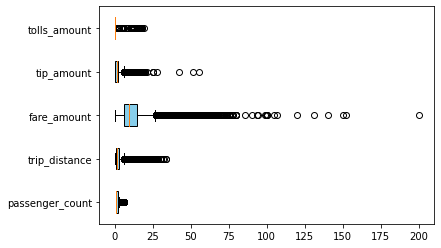

In [332]:
numeric_columns = data.select_dtypes(include='number')


fig, ax = plt.subplots()
ax.boxplot(numeric_columns.values, vert=False, patch_artist=True, labels=numeric_columns.columns, boxprops=dict(facecolor="skyblue"))
plt.show()

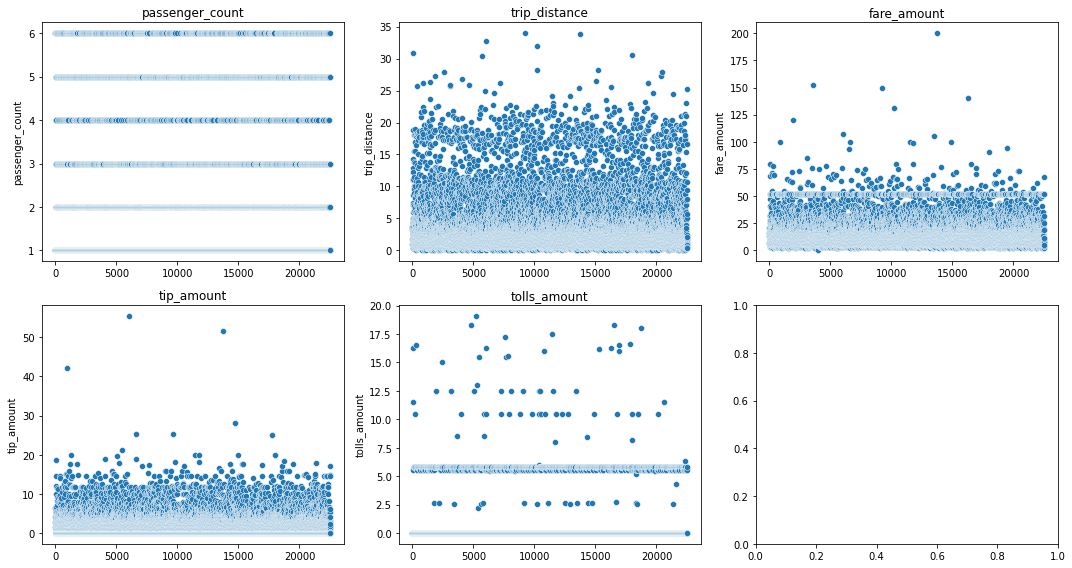

In [333]:
data_new = data[['passenger_count','trip_distance','fare_amount','tip_amount','tolls_amount']]

# subplot 생성
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# 각 산점도 그리기
for i, column in enumerate(data_new.columns):
    row, col = divmod(i, 3)
    sns.scatterplot(x=data.index, y=column, data=data, ax=axes[row, col])
    axes[row, col].set_title(f'{column}')


plt.tight_layout()
plt.show()

In [334]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22497.000000,22497.000000,22497.000000,22497.000000,22497.000000
mean,1.645997,2.932756,12.930996,1.822053,0.309317
std,1.285670,3.656143,10.825952,2.431977,1.385447
min,1.000000,0.010000,0.010000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.090000,14.500000,2.450000,0.000000
max,6.000000,33.960000,200.010000,55.500000,19.100000


# Step 2
## Replace
- Credit Card, Debit Card 구분없이 "Card"로!!

In [316]:
data['payment_method'].replace({'Credit Card' : 'Card', 'Debit Card' : 'Card'}, inplace=True)

In [317]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22524,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22525,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22526,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Card,1,0.42,4.5,0.00,0.00
22527,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Card,1,2.36,10.5,1.70,0.00


In [319]:
data['payment_method'].unique()

array(['Card', 'Cash'], dtype=object)

In [323]:
data.sort_values(by='tip_amount', ascending=False)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
6007,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Card,1,32.72,107.00,55.50,16.26
13751,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Card,1,33.92,200.01,51.64,5.76
968,Elaine Horton,08/23/2017 6:23:26 PM,08/23/2017 7:18:29 PM,Cash,1,16.70,52.00,42.29,0.00
14708,John Greer,11/28/2017 8:47:09 PM,11/28/2017 9:22:38 PM,Card,1,20.90,57.50,28.00,2.64
9633,Miss Karen Smith,09/28/2017 11:56:23 AM,09/28/2017 12:21:12 PM,Cash,1,10.02,30.00,25.20,5.76
...,...,...,...,...,...,...,...,...,...
13417,Jenna Sullivan,09/08/2017 10:47:55 PM,09/08/2017 11:10:41 PM,Card,6,4.68,19.00,0.00,0.00
13418,Valerie Spencer,10/11/2017 7:51:19 PM,10/11/2017 8:01:14 PM,Card,1,2.17,9.00,0.00,0.00
13420,Andrea Campbell,03/07/2017 5:43:30 PM,03/07/2017 5:48:06 PM,Card,1,0.56,5.00,0.00,0.00
13421,Marcia Wilson,10/30/2017 7:50:04 PM,10/30/2017 7:54:34 PM,Cash,1,0.40,4.50,0.00,0.00


In [326]:
data.sort_values(by='passenger_count', ascending=True)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
7040,Latasha Campbell,12/29/2017 1:41:17 PM,12/29/2017 1:55:57 PM,Cash,0,2.10,11.5,2.45,0.0
8521,Jennifer Park,11/14/2017 12:06:01 PM,11/14/2017 12:27:38 PM,Card,0,7.00,23.5,6.05,0.0
1901,Melissa Thompson,09/09/2017 3:44:45 AM,09/09/2017 3:49:19 AM,Cash,0,0.80,5.0,0.00,0.0
10062,Lisa Valentine,12/04/2017 10:41:30 AM,12/04/2017 10:58:23 AM,Card,0,2.00,12.5,3.30,0.0
14403,Kellie Bonilla DVM,12/24/2017 9:02:00 AM,12/24/2017 9:07:56 AM,Card,0,0.90,6.0,1.35,0.0
...,...,...,...,...,...,...,...,...,...
19938,Elizabeth Steele,04/07/2017 10:00:00 AM,04/07/2017 10:13:21 AM,Card,6,1.26,9.5,0.00,0.0
13532,Madison Hahn,03/25/2017 6:42:25 PM,03/25/2017 6:52:03 PM,Card,6,1.01,7.5,1.66,0.0
2286,Jordan Morgan,03/07/2017 3:22:48 PM,03/07/2017 3:34:52 PM,Cash,6,1.08,8.5,1.86,0.0
13530,Paul Cook,01/27/2017 6:48:08 PM,01/27/2017 7:00:06 PM,Cash,6,1.38,9.0,0.00,0.0


### 택시의 주행 시간과 주행 거리, 요금 등의 상관 관계

In [363]:
!pip install -q koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
# 택시 주행 시간
next_date = datetime.strptime('2023-05-01', '%Y-%m-%d')
next_date - sample_date

# 팁과 관계는? 
data['tpep_dropoff_datetime'] < data['tpep_pickup_datetime']


In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22497 entries, 0 to 22496
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22497 non-null  object 
 1   tpep_pickup_datetime   22497 non-null  object 
 2   tpep_dropoff_datetime  22497 non-null  object 
 3   payment_method         22497 non-null  object 
 4   passenger_count        22497 non-null  int64  
 5   trip_distance          22497 non-null  float64
 6   fare_amount            22497 non-null  float64
 7   tip_amount             22497 non-null  float64
 8   tolls_amount           22497 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.5+ MB


In [336]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

comparison_result = data['tpep_dropoff_datetime'] < data['tpep_pickup_datetime']
data[comparison_result]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
9266,Donna Summers,2017-11-05 01:23:08,2017-11-05 01:06:09,Cash,1,5.7,28.0,0.0,0.0


In [338]:
data['boarding_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data.sort_values(by='boarding_time', ascending='False')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding time,boarding_time
9266,Donna Summers,2017-11-05 01:23:08,2017-11-05 01:06:09,Cash,1,5.70,28.0,0.00,0.0,-1 days +23:43:01,-1 days +23:43:01
20005,Pamela Yates,2017-09-16 14:30:38,2017-09-16 14:30:39,Card,2,1.67,12.5,3.99,0.0,0 days 00:00:01,0 days 00:00:01
7092,Vincent Richardson,2017-03-07 16:42:46,2017-03-07 16:42:48,Cash,1,0.20,52.0,17.19,0.0,0 days 00:00:02,0 days 00:00:02
21905,Renee Bowen,2017-07-11 14:42:04,2017-07-11 14:42:06,Card,1,1.10,2.5,0.00,0.0,0 days 00:00:02,0 days 00:00:02
21405,Timothy Ramirez,2017-04-14 21:18:30,2017-04-14 21:18:32,Card,1,1.20,2.5,0.00,0.0,0 days 00:00:02,0 days 00:00:02
...,...,...,...,...,...,...,...,...,...,...,...
15021,Katelyn Greer,2017-04-13 23:41:09,2017-04-14 23:39:42,Cash,2,1.99,7.0,0.00,0.0,0 days 23:58:33,0 days 23:58:33
22437,Margaret Conner,2017-04-03 21:02:49,2017-04-04 21:01:28,Card,1,1.73,9.0,0.00,0.0,0 days 23:58:39,0 days 23:58:39
14857,Jennifer Wilson,2017-07-31 14:04:25,2017-08-01 14:03:16,Cash,5,0.95,8.0,1.76,0.0,0 days 23:58:51,0 days 23:58:51
15435,Ashley Holmes,2017-05-10 18:53:53,2017-05-11 18:53:02,Cash,5,0.74,7.0,0.00,0.0,0 days 23:59:09,0 days 23:59:09


In [343]:
data.drop(columns=['boarding time'], inplace=True)

In [348]:
data.shape #(22497, 10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22497 entries, 0 to 22496
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22497 non-null  object         
 1   tpep_pickup_datetime   22497 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22497 non-null  datetime64[ns] 
 3   payment_method         22497 non-null  object         
 4   passenger_count        22497 non-null  int64          
 5   trip_distance          22497 non-null  float64        
 6   fare_amount            22497 non-null  float64        
 7   tip_amount             22497 non-null  float64        
 8   tolls_amount           22497 non-null  float64        
 9   boarding_time          22497 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(2), timedelta64[ns](1)
memory usage: 1.7+ MB


In [349]:
# -날짜 제거
data = data[data['boarding_time'] > pd.Timedelta(0)]

# 인덱스 재배열
data = data.reset_index(drop=True)

In [350]:
data.shape

(22496, 10)

## 상관관계 분석
 - 당연히 주행시간 요금 간 양 선형관계 있을 것 같았는데 아니다
 - 주행 시간에도 이상치가 있는 것 같아서 확인 후 삭제

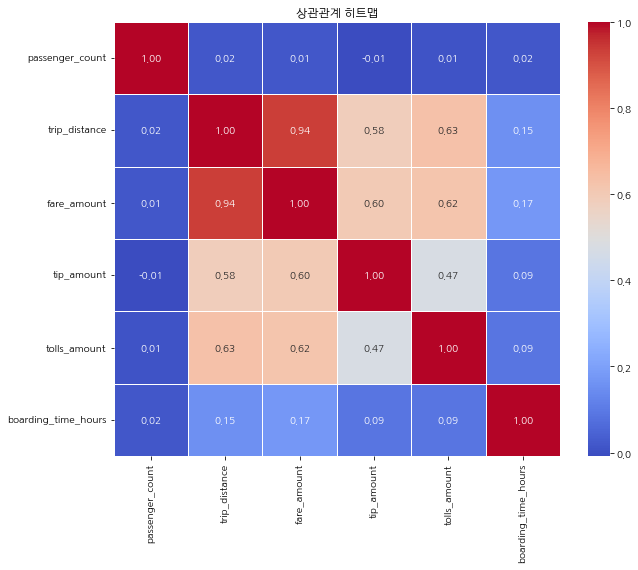

In [364]:
# 상관관계 행렬 계산
correlation_matrix = data.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('상관관계 히트맵')
plt.show()

<AxesSubplot:ylabel='boarding_time'>

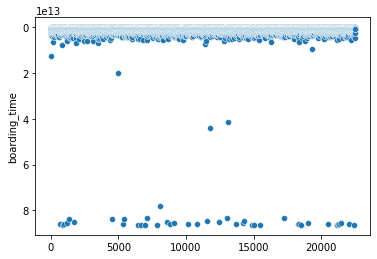

In [354]:
sns.scatterplot(x=data.index, y=data['boarding_time'])

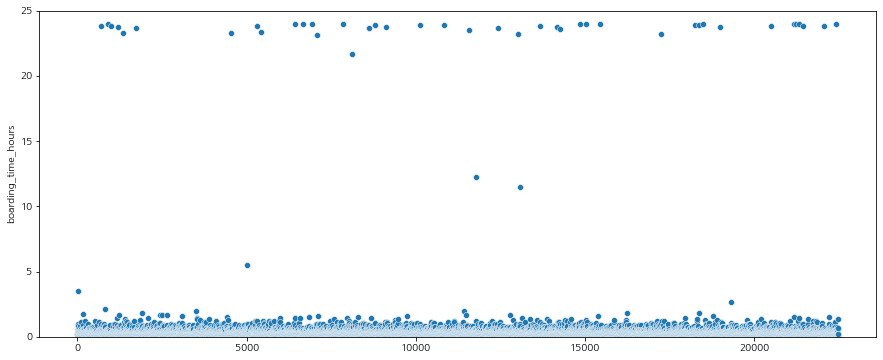

In [369]:
data['boarding_time_hours'] = data['boarding_time'].dt.total_seconds() / 3600

plt.figure(figsize=(15, 6))
sns.scatterplot(x=data.index, y=data['boarding_time_hours'])

plt.ylim(0, 25)

plt.show()


- 5시간 이상 탑승이 가능은 할 것 같으나
- 요금을 보고 이상치인지 실제 10시간 이상 탑승인지 확인해봐야겠다

In [406]:
data[data['boarding_time_hours']<(1/60)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time,boarding_time_hours,total_fare,hourly_fare
158,Jonathan Flores,2017-11-11 20:16:16,2017-11-11 20:17:14,Card,1,0.23,52.0,0.00,0.0,0 days 00:00:58,0.016111,52.00,3227.586207
314,Valerie Mullen,2017-01-14 19:04:51,2017-01-14 19:05:01,Cash,2,0.02,2.5,0.00,0.0,0 days 00:00:10,0.002778,2.50,900.000000
1059,Kyle Johnson,2017-04-12 20:51:58,2017-04-12 20:52:07,Cash,1,2.30,2.5,0.00,0.0,0 days 00:00:09,0.002500,2.50,1000.000000
1320,Amy Patterson MD,2017-03-05 21:46:08,2017-03-05 21:47:04,Cash,1,0.37,3.0,0.00,0.0,0 days 00:00:56,0.015556,3.00,192.857143
1474,Laura Hayes,2017-01-07 09:50:58,2017-01-07 09:51:57,Card,1,0.40,3.5,2.00,0.0,0 days 00:00:59,0.016389,5.50,335.593220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21838,Michael Singleton,2017-12-10 12:20:19,2017-12-10 12:20:56,Cash,1,0.09,2.5,0.00,0.0,0 days 00:00:37,0.010278,2.50,243.243243
21904,Renee Bowen,2017-07-11 14:42:04,2017-07-11 14:42:06,Card,1,1.10,2.5,0.00,0.0,0 days 00:00:02,0.000556,2.50,4500.000000
22188,Jean Smith,2017-01-26 18:06:06,2017-01-26 18:06:58,Card,1,0.30,3.0,1.00,0.0,0 days 00:00:52,0.014444,4.00,276.923077
22322,Lisa Jacobs,2017-04-26 19:03:15,2017-04-26 19:03:38,Card,2,0.08,2.5,1.29,0.0,0 days 00:00:23,0.006389,3.79,593.217391


In [411]:
len(data[data['boarding_time_hours']<(1/60)]) # 83
len(data[data['boarding_time_hours']<(2/60)]) # 379

379

In [412]:
data = data[data['boarding_time_hours']>=(2/60)]

In [378]:
data['total_fare'] = data['fare_amount']+data['tolls_amount']+data['tip_amount']

In [430]:
data_over = data[data['boarding_time_hours']>5]

In [431]:
data_over.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time,boarding_time_hours,total_fare,hourly_fare
count,44.000000,44.000000,44.000000,44.000000,44.000000,44,44.000000,44.000000,44.000000
mean,2.045455,3.830455,17.136364,1.574773,0.382727,0 days 22:45:29.454545454,22.758182,19.093864,1.107018
std,1.697530,4.242106,12.991663,2.941901,1.431503,0 days 03:39:51.514114224,3.664309,16.069730,1.838241
min,1.000000,0.330000,4.500000,0.000000,0.000000,0 days 05:32:07,5.535278,4.500000,0.188807
25%,1.000000,1.252500,8.375000,0.000000,0.000000,0 days 23:34:16,23.571111,9.570000,0.399082
50%,1.000000,2.030000,13.250000,0.000000,0.000000,0 days 23:50:26,23.840556,14.215000,0.604222
75%,3.000000,4.400000,19.750000,2.070000,0.000000,0 days 23:56:32.500000,23.942361,20.815000,0.881912
max,6.000000,19.760000,52.000000,11.370000,5.760000,0 days 23:59:33,23.992500,67.410000,11.012997


In [429]:
data_normal = data[data['boarding_time_hours']<=5]
data_normal.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time,boarding_time_hours,total_fare,hourly_fare
count,22070.000000,22070.000000,22070.000000,22070.000000,22070.000000,22070,22070.000000,22070.000000,22070.000000
mean,1.647349,2.972054,13.028723,1.837714,0.311677,0 days 00:14:38.992931581,0.244165,15.178114,65.878479
std,1.285554,3.669995,10.723200,2.426232,1.391502,0 days 00:11:37.205848084,0.193668,13.263339,20.979904
min,1.000000,0.020000,0.010000,0.000000,0.000000,0 days 00:02:00,0.033333,3.000000,15.402567
25%,1.000000,1.000000,6.500000,0.000000,0.000000,0 days 00:06:56,0.115556,7.500000,51.869047
50%,1.000000,1.680000,9.500000,1.360000,0.000000,0 days 00:11:24,0.190000,11.000000,61.402912
75%,2.000000,3.100000,14.500000,2.450000,0.000000,0 days 00:18:33,0.309167,16.950000,74.638071
max,6.000000,33.960000,200.010000,55.500000,19.100000,0 days 03:29:10,3.486111,257.410000,436.363636


In [435]:
data_over

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time,boarding_time_hours,total_fare,hourly_fare
683,Scott Garcia,2017-06-10 21:55:01,2017-06-11 21:45:51,Card,1,1.36,8.5,1.47,0.00,0 days 23:50:50,23.847222,9.97,0.418078
908,Michael Perez,2017-02-09 23:24:58,2017-02-10 23:24:31,Cash,5,4.86,17.5,0.00,0.00,0 days 23:59:33,23.992500,17.50,0.729395
994,James Anderson,2017-12-08 07:17:20,2017-12-09 07:07:22,Cash,1,0.33,4.5,0.00,0.00,0 days 23:50:02,23.833889,4.50,0.188807
1183,Carla Allen,2017-11-12 19:52:44,2017-11-13 19:37:35,Card,1,4.14,18.0,3.76,0.00,0 days 23:44:51,23.747500,21.76,0.916307
1336,Jamie Collins,2017-04-17 21:26:49,2017-04-18 20:46:13,Cash,6,4.09,15.0,0.00,0.00,0 days 23:19:24,23.323333,15.00,0.643133
1734,Ronald Kidd,2017-12-28 23:58:24,2017-12-29 23:38:45,Cash,1,1.23,7.0,1.66,0.00,0 days 23:40:21,23.672500,8.66,0.365825
4552,Brandon Miller,2017-12-20 08:24:34,2017-12-21 07:39:27,Cash,4,1.26,10.0,0.00,0.00,0 days 23:14:53,23.248056,10.00,0.430144
4999,Manuel Haynes,2017-08-07 18:27:53,2017-08-08 00:00:00,Cash,1,14.35,50.5,10.46,0.00,0 days 05:32:07,5.535278,60.96,11.012997
5314,Catherine Ray,2017-12-13 19:40:05,2017-12-14 19:31:09,Cash,3,0.93,12.0,2.07,0.00,0 days 23:51:04,23.851111,14.07,0.589910
5421,Patricia Galvan,2017-09-19 13:16:13,2017-09-20 12:36:12,Card,1,0.62,5.5,0.00,0.00,0 days 23:19:59,23.333056,5.50,0.235717


- 이상치 근거
    - 주행시간과 택시 요금은 비례해야 한다.
    - 오히려 주행시간이 길어졌음에도 요금이 더 작음

In [436]:
print(data_normal['trip_distance'].mean()) # 2.9308734188491004
print(data_normal['trip_distance'].median()) # 1.63

print(data_normal['total_fare'].mean()) # 15.053889185818635
print(data_normal['total_fare'].median()) #11

2.972054372451291
1.68
15.178114182147711
11.0


In [443]:
print(data_over['trip_distance'].mean()) # 3.830454545454546
print(data_over['trip_distance'].median()) # 2.0300000000000002

print(data_over['total_fare'].mean()) # 19.093863636363636
print(data_over['total_fare'].median()) #14.215
data_over.iloc[:, 8:].describe()

3.830454545454546
2.0300000000000002
19.093863636363636
14.215


,tolls_amount,boarding_time,boarding_time_hours,total_fare,hourly_fare
count,44.000000,44,44.000000,44.000000,44.000000
mean,0.382727,0 days 22:45:29.454545454,22.758182,19.093864,1.107018
std,1.431503,0 days 03:39:51.514114224,3.664309,16.069730,1.838241
min,0.000000,0 days 05:32:07,5.535278,4.500000,0.188807
25%,0.000000,0 days 23:34:16,23.571111,9.570000,0.399082
50%,0.000000,0 days 23:50:26,23.840556,14.215000,0.604222
75%,0.000000,0 days 23:56:32.500000,23.942361,20.815000,0.881912
max,5.760000,0 days 23:59:33,23.992500,67.410000,11.012997


In [444]:
data_normal['hourly_fare'] = data_normal['total_fare'] / data_normal['boarding_time_hours']
data_normal.iloc[:, 8:].describe()

/tmp/ipykernel_81/4051346571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_normal['hourly_fare'] = data_normal['total_fare'] / data_normal['boarding_time_hours']


,tolls_amount,boarding_time,boarding_time_hours,total_fare,hourly_fare
count,22070.000000,22070,22070.000000,22070.000000,22070.000000
mean,0.311677,0 days 00:14:38.992931581,0.244165,15.178114,65.878479
std,1.391502,0 days 00:11:37.205848084,0.193668,13.263339,20.979904
min,0.000000,0 days 00:02:00,0.033333,3.000000,15.402567
25%,0.000000,0 days 00:06:56,0.115556,7.500000,51.869047
50%,0.000000,0 days 00:11:24,0.190000,11.000000,61.402912
75%,0.000000,0 days 00:18:33,0.309167,16.950000,74.638071
max,19.100000,0 days 03:29:10,3.486111,257.410000,436.363636


In [417]:
data_over['hourly_fare'] = data_over['total_fare'] / data_over['boarding_time_hours']

/tmp/ipykernel_81/3326304973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_over['hourly_fare'] = data_over['total_fare'] / data_over['boarding_time_hours']


In [427]:
data_normal['hourly_fare'].describe()

count    22070.000000
mean        65.878479
std         20.979904
min         15.402567
25%         51.869047
50%         61.402912
75%         74.638071
max        436.363636
Name: hourly_fare, dtype: float64

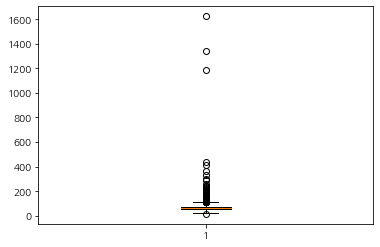

In [419]:
fig, ax = plt.subplots()
ax.boxplot(data_normal['hourly_fare'])
plt.show()

In [422]:
top_3_rows = data.sort_values(by='hourly_fare', ascending=False).head(3)
data = data.drop(top_3_rows.index)

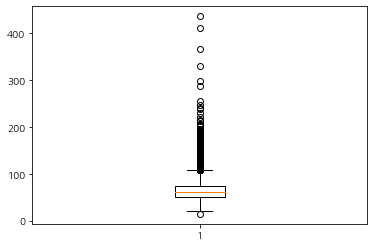

In [426]:
fig, ax = plt.subplots()
ax.boxplot(data_normal['hourly_fare'])
plt.show()

In [400]:
data_over['hourly_fare'].describe()

count    44.000000
mean      1.107018
std       1.838241
min       0.188807
25%       0.399082
50%       0.604222
75%       0.881912
max      11.012997
Name: hourly_fare, dtype: float64

In [402]:
data_normal.sort_values(by='boarding_time_hours')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time,boarding_time_hours,total_fare,hourly_fare
20004,Pamela Yates,2017-09-16 14:30:38,2017-09-16 14:30:39,Card,2,1.67,12.5,3.99,0.00,0 days 00:00:01,0.000278,16.49,59364.000000
21404,Timothy Ramirez,2017-04-14 21:18:30,2017-04-14 21:18:32,Card,1,1.20,2.5,0.00,0.00,0 days 00:00:02,0.000556,2.50,4500.000000
7092,Vincent Richardson,2017-03-07 16:42:46,2017-03-07 16:42:48,Cash,1,0.20,52.0,17.19,0.00,0 days 00:00:02,0.000556,69.19,124542.000000
21904,Renee Bowen,2017-07-11 14:42:04,2017-07-11 14:42:06,Card,1,1.10,2.5,0.00,0.00,0 days 00:00:02,0.000556,2.50,4500.000000
13182,Chelsea Smith,2017-05-16 18:30:45,2017-05-16 18:30:47,Cash,1,8.40,2.5,0.00,0.00,0 days 00:00:02,0.000556,2.50,4500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503,George Garcia,2017-12-07 06:42:55,2017-12-07 08:39:45,Card,6,13.45,75.5,15.26,0.00,0 days 01:56:50,1.947222,90.76,46.609986
11432,Deanna Kelley,2017-06-09 15:25:48,2017-06-09 17:24:40,Card,2,24.20,52.0,20.00,5.76,0 days 01:58:52,1.981111,77.76,39.250701
803,Justin Jenkins,2017-06-20 08:15:18,2017-06-20 10:24:37,Cash,1,17.77,52.0,11.71,5.76,0 days 02:09:19,2.155278,69.47,32.232504
19314,Jeremy Thompson PhD,2017-04-26 08:31:31,2017-04-26 11:10:50,Card,1,26.12,52.0,0.00,5.76,0 days 02:39:19,2.655278,57.76,21.752903


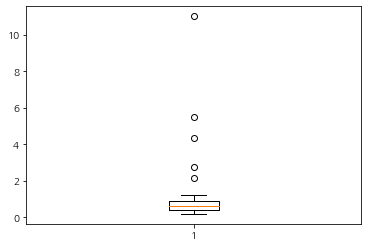

In [432]:
fig, ax = plt.subplots()
ax.boxplot(data_over['hourly_fare'])
plt.show()

In [445]:
data = data[data['boarding_time_hours']<20]

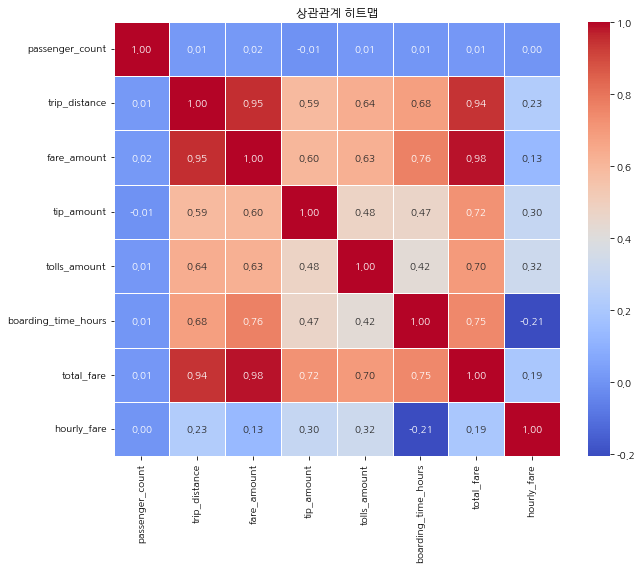

In [446]:
# 상관관계 행렬 계산
correlation_matrix = data.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('상관관계 히트맵')
plt.show()

### 상관관계
- (fare_amount, trip_distance) : 0.95
- (total_fare, trip_distance) : 0.94
    - (total_fare, fare_amount) : 0.98 => 

In [447]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time,boarding_time_hours,total_fare,hourly_fare
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,0 days 00:14:04,0.234444,15.76,67.222749
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,0 days 00:26:30,0.441667,20.00,45.283019
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,0 days 00:07:12,0.120000,7.95,66.250000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,0 days 00:30:15,0.504167,26.89,53.335537
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,0 days 00:16:43,0.278611,16.50,59.222333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22491,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,0 days 00:03:16,0.054444,4.00,73.469388
22492,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,0 days 00:40:48,0.680000,72.40,106.470588
22493,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,0 days 00:04:08,0.068889,4.50,65.322581
22494,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,0 days 00:11:56,0.198889,12.20,61.340782


In [ ]:
# 상관관계 행렬 계산
correlation_matrix = data.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('상관관계 히트맵')
plt.show()

In [ ]:
data.drop(columns=['특정열'], inplace=True)